<font color=green> Diabetes Prediction </font>

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
data=pd.read_csv("health care diabetes.csv", na_values={"Glucose":[0," "], "BloodPressure":[0," "], "SkinThickness":[0," "], "Insulin":[0," "], "BMI":[0," "]})

In [2]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1


In [3]:
data.shape

(768, 9)

<font color=blue>We have 768 observations in our sample dataset with 9 variables where 'Outcome' is our target variable.</font>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<font color=blue>Among the 9 variables, 6 are float data type and 3 are int data type.</font>

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


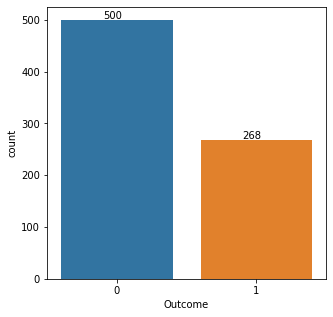

In [6]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(5,5))
ax=sns.countplot(x="Outcome", data=data)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+.3, p.get_height()+2))

<font color=blue> From the above count plot we can say that in our dataset we have 500 records with output 0 means no diabetes and 268 nos of records have output 1, means diabetic patient.</font>

In [7]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<font color=blue>As for the columns, a value of zero does not make sense and thus zero values have been indicated as missing value.</font>

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


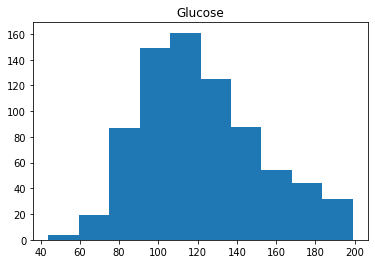

In [8]:
plt.hist(x=data.Glucose)
plt.title("Glucose")
plt.savefig("Distribution of Glucose.png")
plt.show()

<font color=blue>Gluscose is symmetrically distributed, we will take mean to fill na values</font>

In [9]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
data["Glucose"]=si.fit_transform(data["Glucose"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


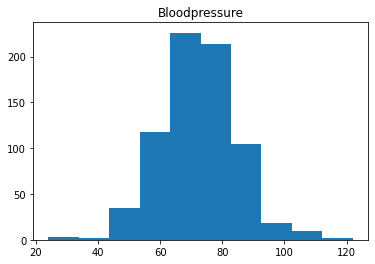

In [10]:
plt.hist(x=data.BloodPressure)
plt.title("Bloodpressure")
plt.savefig("Distribution of BP.png")
plt.show()

<font color=blue>BloodPressure is symmetrically distributed, we will take "mean" to fill na values</font>

In [11]:

from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
data["BloodPressure"]=si.fit_transform(data["BloodPressure"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


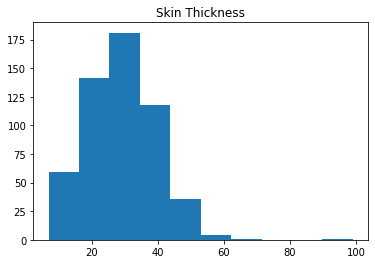

In [12]:
plt.hist(x=data.SkinThickness)
plt.title("Skin Thickness")
plt.savefig("Distribution of Skin Thickness.png")
plt.show()

<font color=blue>SkinThickness is rightly skewed distributed, we will take "median" to fill na values.</font>

In [13]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="median")
data["SkinThickness"]=si.fit_transform(data["SkinThickness"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


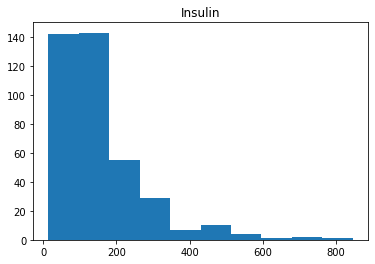

In [14]:
plt.hist(x=data.Insulin)
plt.title("Insulin")
plt.savefig("Distribution of Insulin.png")
plt.show()

<font color=blue>  Insulin is rightly skewed distributed, we will take "median" to fill na values.</font>

In [15]:

from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="median")
data["Insulin"]=si.fit_transform(data["Insulin"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


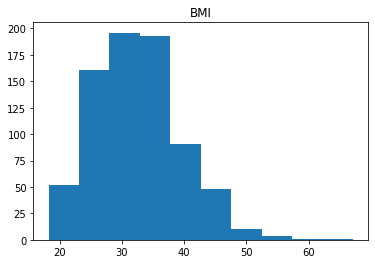

In [16]:
plt.hist(x=data.BMI)
plt.title("BMI")
plt.savefig("Distribution of BMI.png")
plt.show()

<font color=blue>BMI is symmetrically distributed, we will take "mean" to fill na values.</font>

In [17]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
data["BMI"]=si.fit_transform(data["BMI"].values.reshape(-1,1))

In [18]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
data.groupby("Outcome")["Glucose"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,110.710121,107.5,197.0,44.0,500,24.71706
1,142.165573,140.0,199.0,78.0,268,29.54175


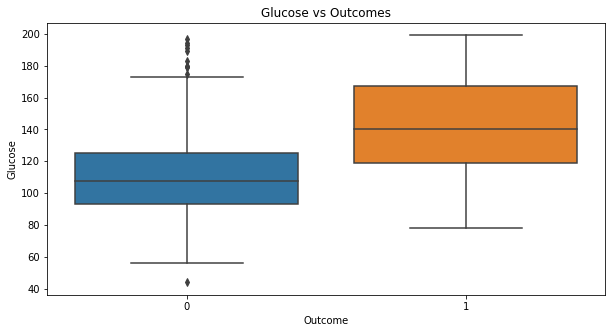

In [20]:
mean_glucose=np.mean(data["Glucose"])
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Glucose", data=data)
plt.title("Glucose vs Outcomes")
plt.savefig("Boxplot of Glucose.png")
plt.show()

<font color=blue>So, for outcome as non-diabetic person the average glucose level is 110.7 which is lower than a diabetic person that is 140.0. Sowe can state that the chances of having diabetes increased with glucose level, it means both are strongly positively correlated.</font>

In [21]:
data.groupby("Outcome")["Pregnancies"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,3.298000,2,13,0,500,3.017185
1,4.865672,4,17,0,268,3.741239


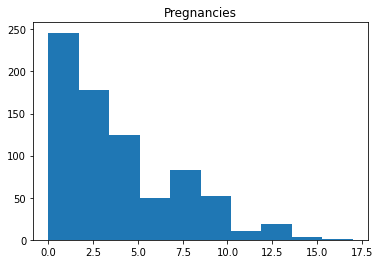

In [22]:
plt.hist(x=data.Pregnancies)
plt.title("Pregnancies")
plt.savefig("Distribution of Pregnancies.png")
plt.show()

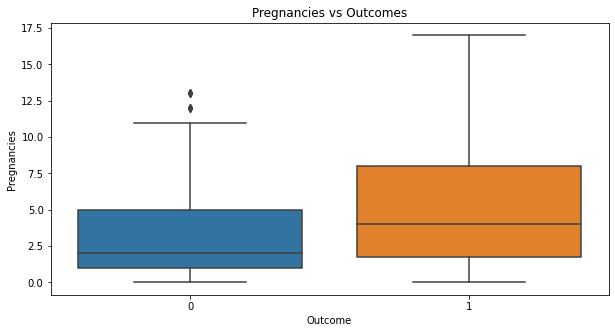

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Pregnancies", data=data)
plt.title("Pregnancies vs Outcomes")
plt.savefig("Boxplot of Pregnancies.png")
plt.show()

<font color=blue>For women who have more no. of pregnancies, have higher chace of getting diabetes. According to our data, a non-diabetic woman's average no. of pregnancies is 3.29 which is lower than a diabetic woman and the chances of having diabetes increased with no. of pregnancies, it means both are positively correlated.</font>

In [24]:
data.groupby("Outcome")["BloodPressure"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,70.935397,72.0,122.0,24.0,500,11.931033
1,75.147324,74.0,114.0,30.0,268,11.945712


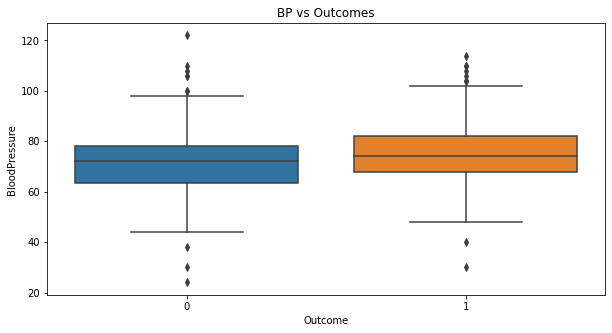

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="BloodPressure", data=data)
plt.title("BP vs Outcomes")
plt.savefig("Boxplot of BP.png")
plt.show()

<font color=blue> Our data says there is no much difference BloodPressure level of a diabetic and non diabetic person.Blood Pressure level of a diabetic person is 74.0 where for a non diabetic person the level is 72.0.</font>

In [26]:
data.groupby("Outcome")["SkinThickness"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,27.726000,29.0,60.0,7.0,500,8.552966
1,31.686567,29.0,99.0,7.0,268,8.662994


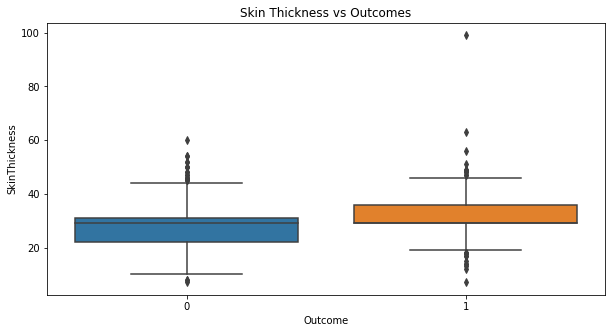

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="SkinThickness", data=data)
plt.title("Skin Thickness vs Outcomes")
plt.savefig("Boxplot of Skin Thickness.png")
plt.show()

<font color=blue> From the box plot we can say, the median of both the data of both outcomes is same (29.0). The average skin thickness of persons with diabetes is higher than that of a non diabetic person. </font>

In [28]:
data.groupby("Outcome")["Insulin"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,127.792000,125.0,744.0,15.0,500,74.447469
1,164.701493,125.0,846.0,14.0,268,100.932249


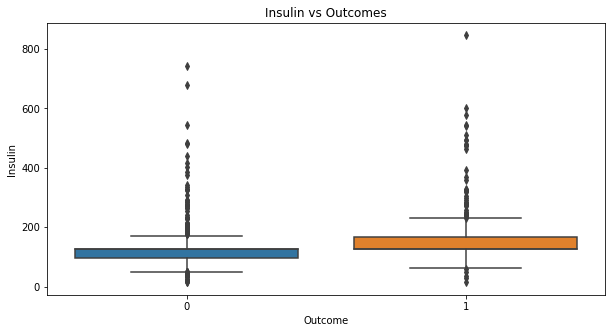

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Insulin", data=data)
plt.title("Insulin vs Outcomes")
plt.savefig("Boxplot of Insulin.png")
plt.show()

<font color=blue> An insufficient basal insulin dose can cause a high blood sugar reading. According to our data, the person with 0 as outcome has lower insulin than the person with 1 as outcome. This variable has lots of outliers, the expected result might have changed.</font>

In [30]:
data.groupby("Outcome")["BMI"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,30.888434,30.40,57.3,18.2,500,6.504779
1,35.384757,34.25,67.1,22.9,268,6.595065


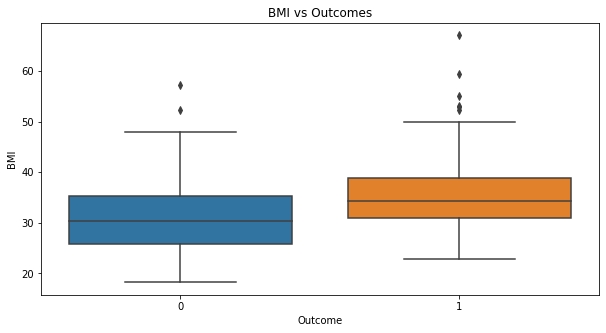

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="BMI", data=data)
plt.title("BMI vs Outcomes")
plt.savefig("Boxplot of BMI.png")
plt.show()

<font color=blue> BMI greatly increases your risk of developing diabetes. A person with higher BMI has more tendency of having diabetes. From our data we can say, the average BMI of a diabetic person (35.38) is higher than that of a non diabetic person (30.88).</font>

In [32]:
data.groupby("Outcome")["Age"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,31.190000,27,81,21,500,11.667655
1,37.067164,36,70,21,268,10.968254


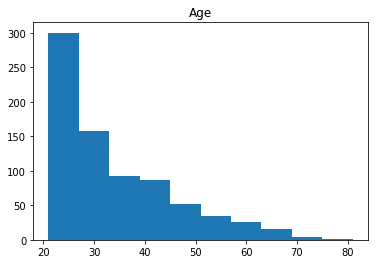

In [33]:
plt.hist(x=data.Age)
plt.title("Age")
plt.savefig("Distribution of Age.png")
plt.show()

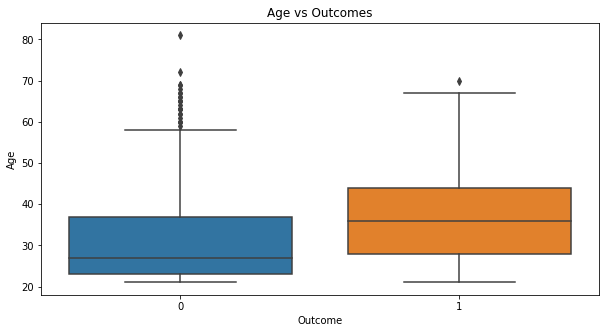

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Age", data=data)
plt.title("Age vs Outcomes")
plt.savefig("Boxplot of Age.png")
plt.show()

<font color=blue>Age is one of the most important risk factors diabetes and the burden of the disease is very high in older age groups, by observing the above boxplots we can say age and having diabetes is hugely positively correlated.</font>

In [35]:
data.groupby("Outcome")["DiabetesPedigreeFunction"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,0.429734,0.336,2.329,0.078,500,0.299085
1,0.550500,0.449,2.420,0.088,268,0.372354


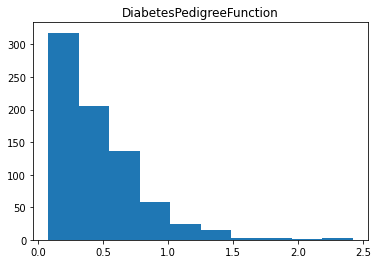

In [36]:
plt.hist(x=data.DiabetesPedigreeFunction)
plt.title("DiabetesPedigreeFunction")
plt.savefig("Distribution of DiabetesPedigreeFunction.png")
plt.show()

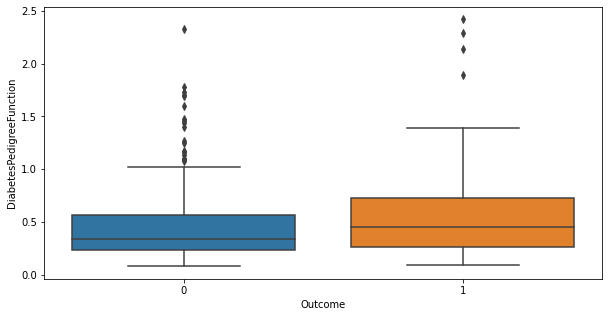

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=data)
plt.show()

<font color=blue>the diabetes pedigree function provides “a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject.” So with the increase of Diabetes Pedigree Function value the chances of having diabetes increases. This variable is positive correlated with outcome.</font>

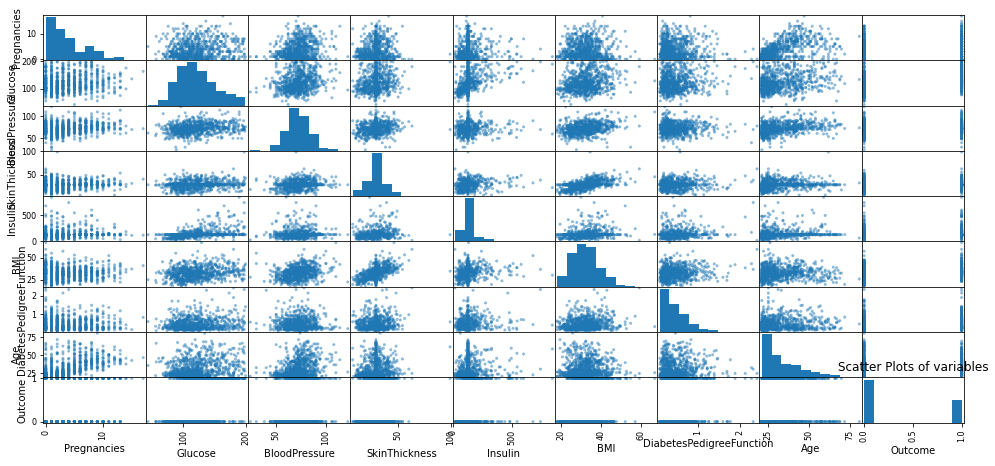

In [38]:
scatter_matrix(data, figsize=(16.5,7.5))
plt.title("Scatter Plots of variables")
plt.savefig("scatter_matrix.png")
plt.show()

In [41]:
corrmat=data.corr()

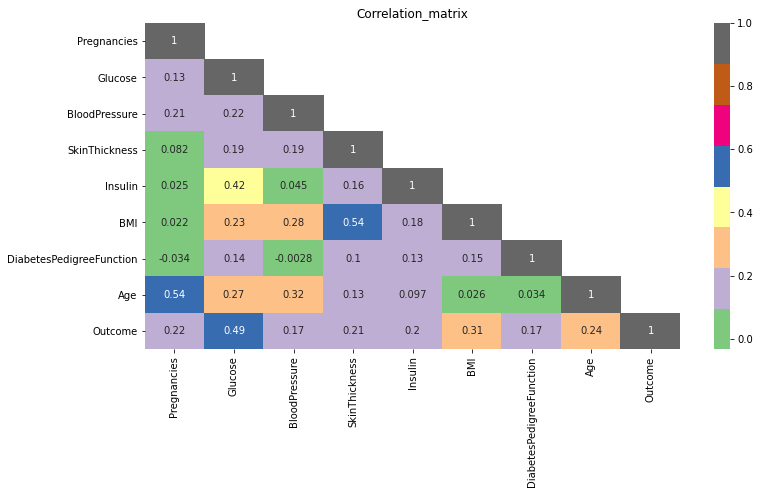

In [42]:
plt.figure(figsize=(12,6))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)
plt.title("Correlation_matrix")
plt.savefig("correlation.png")
plt.show()

<AxesSubplot:>

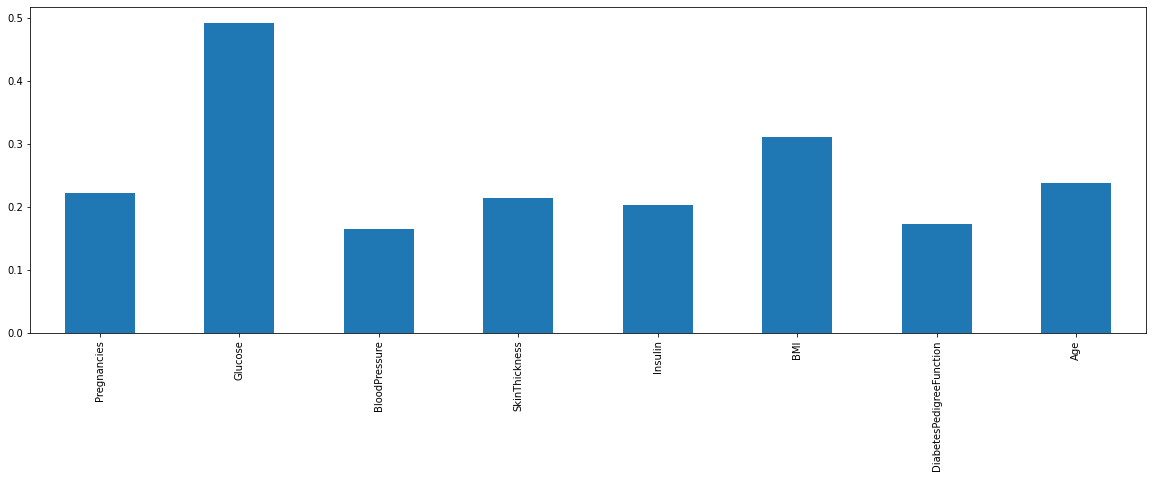

In [38]:
plt.figure(figsize=(20,6))
data.drop("Outcome", axis=1).corrwith(data["Outcome"]).plot(kind="bar")
plt.title("Correlation with target Variable")
plt.savefig("correlation_with_target.png")
plt.show()

<font color=orange>Observation: from the scatterplots of the dataset and correlation matrix, we can say, all variables are positvely corelated to the dependent variable 'Outcome', among all the variables 'Glucose' has higher correlation value with 'Outcome' or 'Glucose' is more effective than other varibales for being a diabetic person.After 'Glucose', 'BMI' & 'Age' have more impact than other variables. </font>

In [39]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
from scipy.stats import f_oneway
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
selected_predictor=[]
def func_annova(data,target_var, list_of_cont):
    for col in cols:
        contgroup=data.groupby(target_var)[col].apply(list)
        annova_results=f_oneway(*contgroup)
        if (annova_results[1]<.05):
            print(col,"related to", target_var, "is", annova_results[1], "SELECTED")
            selected_predictor.append(col)
        else:
            print(col,"related to", target_var, "is", annova_results[1], "NOT SELECTED")

In [41]:
func_annova(data,"Outcome", cols)

Pregnancies related to Outcome is 5.065127298052554e-10 SELECTED
Glucose related to Outcome is 2.9092516568460933e-48 SELECTED
BloodPressure related to Outcome is 3.709288185093033e-06 SELECTED
SkinThickness related to Outcome is 1.7939583262322968e-09 SELECTED
Insulin related to Outcome is 1.2100257034122418e-08 SELECTED
BMI related to Outcome is 8.595300884274331e-19 SELECTED
DiabetesPedigreeFunction related to Outcome is 1.2546070101485626e-06 SELECTED
Age related to Outcome is 2.2099754606650332e-11 SELECTED


In [42]:
#to handle the outliers
from scipy.stats import zscore
z=abs(zscore(data))
data_mod=data[(z<3).all(axis=1)]

In [43]:
data.shape, data_mod.shape

((768, 9), (718, 9))

In [44]:
X=data_mod.drop(columns="Outcome")
y=data_mod.Outcome

In [45]:
#to handle the skewness
X.skew()
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [46]:
X.skew()

Pregnancies                -0.279087
Glucose                    -0.046195
BloodPressure               0.138556
SkinThickness               0.076828
Insulin                    -0.879176
BMI                         0.329505
DiabetesPedigreeFunction    0.804702
Age                         0.593590
dtype: float64

In [47]:
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [48]:
X.skew()

Pregnancies                -0.279087
Glucose                    -0.046195
BloodPressure               0.138556
SkinThickness               0.076828
Insulin                    -0.879176
BMI                         0.329505
DiabetesPedigreeFunction    0.562291
Age                         0.500849
dtype: float64

In [49]:
#to handle multi collinearity of predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifs
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF"]=[vifs(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,Pregnancies,4.836643
1,Glucose,417.548114
2,BloodPressure,52.656019
3,SkinThickness,19.378956
4,Insulin,157.574742
5,BMI,39.840841
6,DiabetesPedigreeFunction,6.402787
7,Age,392.146155


In [50]:
X_mod=X.drop (columns=["BloodPressure", "SkinThickness", "Insulin"])
X_mod.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [51]:
#performing standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(X_mod)
X_mod=pd.DataFrame(X_mod, columns=X_mod.columns)

In [52]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=123, test_size=.2)

In [53]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,mean_absolute_error,mean_squared_error
model=[LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3) ]
for m in model:
    m.fit(X_train, y_train)
    m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Classification Repport:", classification_report(y_test,y_pred))
    print("*********************************************")
    print()
    print() 

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.7986111111111112
mse: 0.2013888888888889
rmse: 0.44876373392787533
Classification Repport:               precision    recall  f1-score   support

           0       0.86      0.84      0.85        99
           1       0.67      0.71      0.69        45

    accuracy                           0.80       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.80      0.80      0.80       144

*********************************************


for model: GaussianNB(priors=None, var_smoothing=1e-09) acc_score: 0.75
mse: 0.25
rmse: 0.5
Classification Repport:               precision    recall  f1-score   support

           0 

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<font color=red>Ensemble technique to improve the accuracy</font>

In [54]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
rf=RandomForestClassifier(n_estimators=500, random_state=123)
gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=500, random_state=123)
en=[rf, gdb,adb]
for i in en:
    i.fit(X_train, y_train)
    i.score(X_train, y_train)
    y_pred=i.predict(X_test)
    print("for Ensemble Tech", i, "Accuracy Score:", accuracy_score(y_test,y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()
    print()

for Ensemble Tech RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False) Accuracy Score: 0.7777777777777778
mse: 0.2222222222222222
rmse: 0.4714045207910317


for Ensemble Tech GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_

<font color=violet> As after ensemble techniques also, LogisticRegression is showing the highest accuracy that is 79.86%.</font>

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid={"solver" :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "max_iter": [100,200,300,400,500],
           "random_state": range(42,200)}
clf=GridSearchCV(LogisticRegression(), param_grid)
clf.fit(X_train,y_train)
clf.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

{'max_iter': 100, 'random_state': 42, 'solver': 'newton-cg'}

In [59]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=42, test_size=.2)
final_model=LogisticRegression(max_iter= 100, random_state=42, solver='newton-cg')
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train)
y_pred=final_model.predict(X_test)
print("for Model",final_model , "Accuracy Score:", accuracy_score(y_test,y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for Model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) Accuracy Score: 0.7986111111111112
mse: 0.2013888888888889
rmse: 0.44876373392787533


In [60]:
from sklearn.externals import joblib
joblib.dump(final_model, "Model_diabetes_predictor.obj")

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Model_diabetes_predictor.obj']

<font color=purple>Model build by ANN</font>